In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv")

In [5]:
air_quality = air_quality.rename(columns={"date.utc": "datetime"})

In [6]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [7]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [8]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

In [9]:
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [11]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [12]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

In [13]:
air_quality["month"] = air_quality["datetime"].dt.month

In [14]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


In [15]:
ts = pd.Timestamp("2018-01-06 00:00:00")

In [16]:
ts.day_name()

'Saturday'

In [18]:
offset = pd.offsets.BusinessHour(start="09:00")

In [19]:
offset.rollforward(ts)

Timestamp('2018-01-08 09:00:00')

In [20]:
ts + offset

Timestamp('2018-01-08 10:00:00')

In [21]:
ts = pd.Timestamp("2014-01-01 09:00")

In [22]:
day = pd.offsets.Day()

In [23]:
day + ts

Timestamp('2014-01-02 09:00:00')

In [24]:
(day + ts).normalize()

Timestamp('2014-01-02 00:00:00')

In [27]:
ts = pd.Timestamp("2014-01-01 22:00")

In [28]:
hour = pd.offsets.Hour()

In [29]:
hour + ts

Timestamp('2014-01-01 23:00:00')

In [30]:
(hour + ts).normalize()

Timestamp('2014-01-01 00:00:00')

In [31]:
(hour + pd.Timestamp("2014-01-01 23:30")).normalize()

Timestamp('2014-01-02 00:00:00')

In [37]:
d = pd.Timestamp(2008, 8, 18, 9, 0)

In [40]:
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

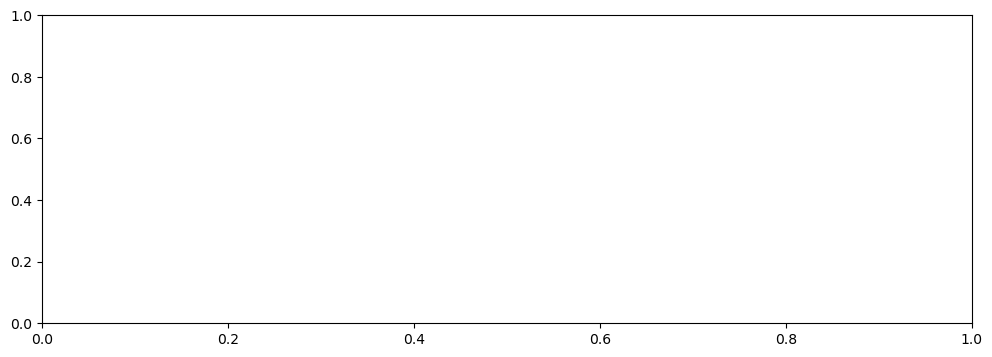

In [41]:
fig, axs = plt.subplots(figsize=(12, 4))

In [42]:
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

<Axes: xlabel='datetime'>

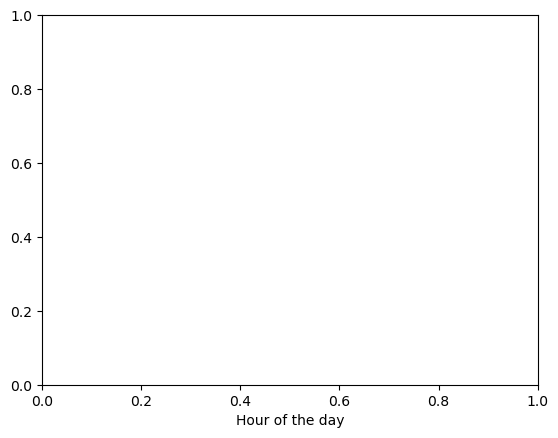

In [43]:
plt.xlabel("Hour of the day");

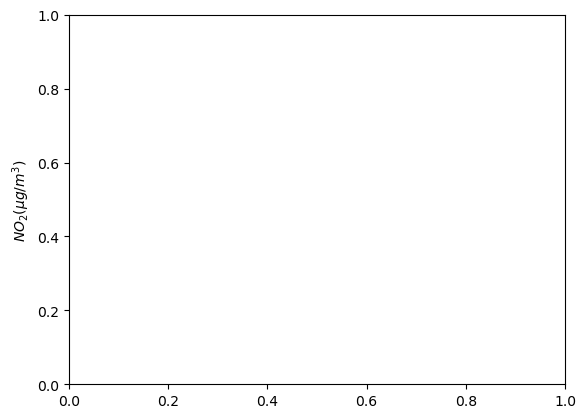

In [44]:
plt.ylabel("$NO_2 (µg/m^3)$");

In [45]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")

In [46]:
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [47]:
no_2.index.year, no_2.index.weekday

(Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        ...
        2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
       dtype='int32', name='datetime', length=1033),
 Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        ...
        3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       dtype='int32', name='datetime', length=1033))

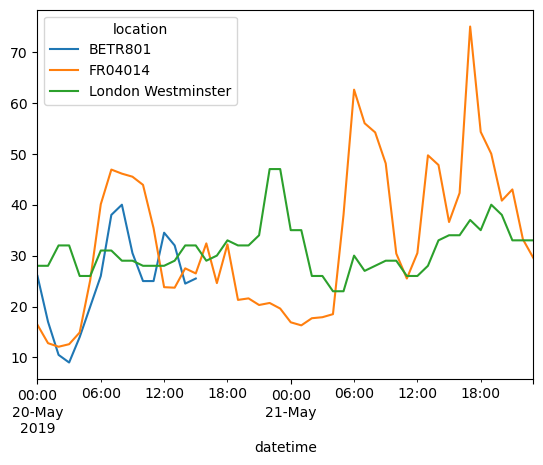

In [48]:
no_2["2019-05-20":"2019-05-21"].plot();

In [49]:
monthly_max = no_2.resample("ME").max()

In [50]:
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [51]:
monthly_max.index.freq

<MonthEnd>

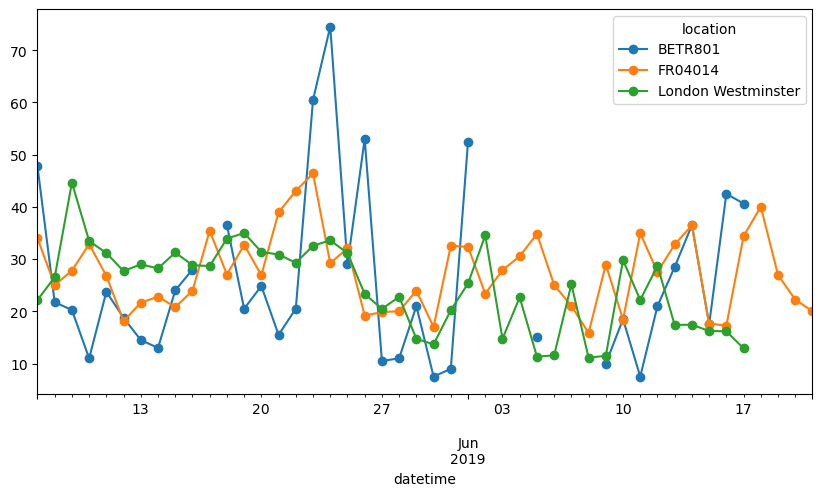

In [52]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));